Plot Force Convergence

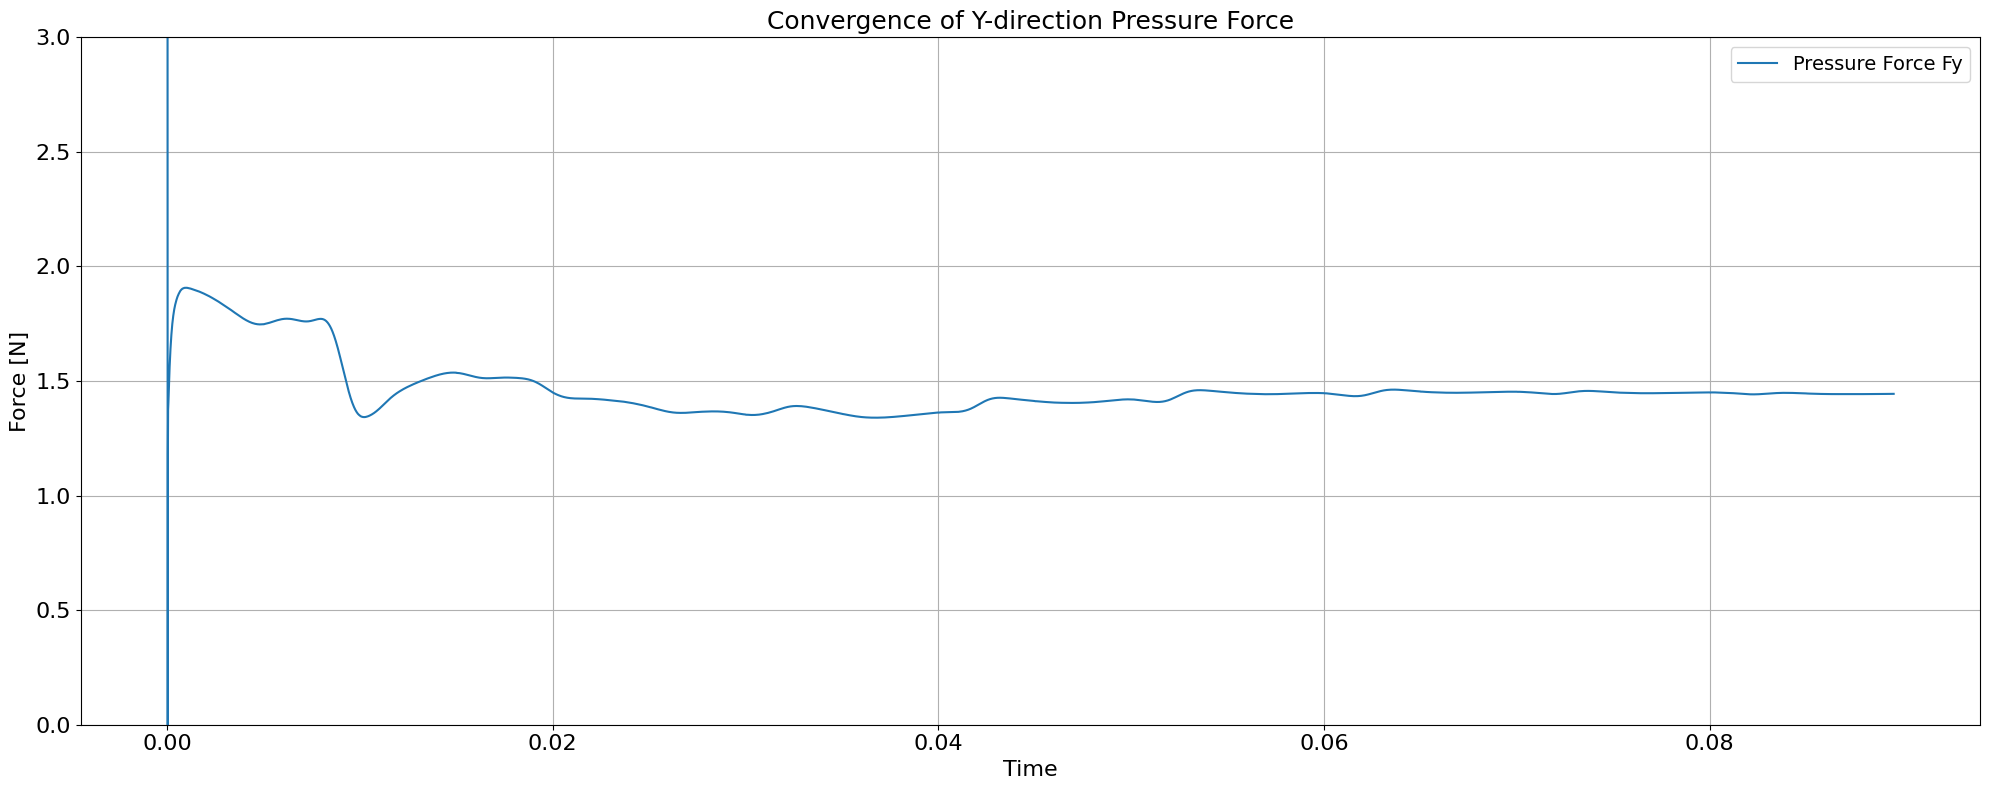

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("forces.dat",skiprows=[0,1,3], sep="\t")

# Extract force
Fy = (
    df.iloc[:, 1].astype(str)
    .str.replace("(", " ", regex=False)
    .str.replace(")", " ", regex=False)
    .str.split()
    .str[1]
    .astype(float)
    .to_numpy()
)

# Plot
t = df.iloc[:, 0].to_numpy()

plt.style.use("default")
plt.figure(figsize=(20, 8))

plt.plot(t, Fy, label="Pressure Force Fy")

plt.xlabel("Time", fontsize=16)
plt.ylabel("Force [N]", fontsize=16)
plt.ylim(0, 3)
plt.title("Convergence of Y-direction Pressure Force", fontsize=18)
plt.tick_params(axis="both", labelsize=16)
plt.grid()
plt.legend(fontsize=14)

plt.tight_layout()
plt.show()

The force convergence metric is defined as the peak-to-peak variation of the force over a sliding window, normalized by the mean force over the same window. A threshold of 1e-3 corresponds to a relative force variation of 0.1%, which is commonly accepted as good convergence in steady CFD simulations.


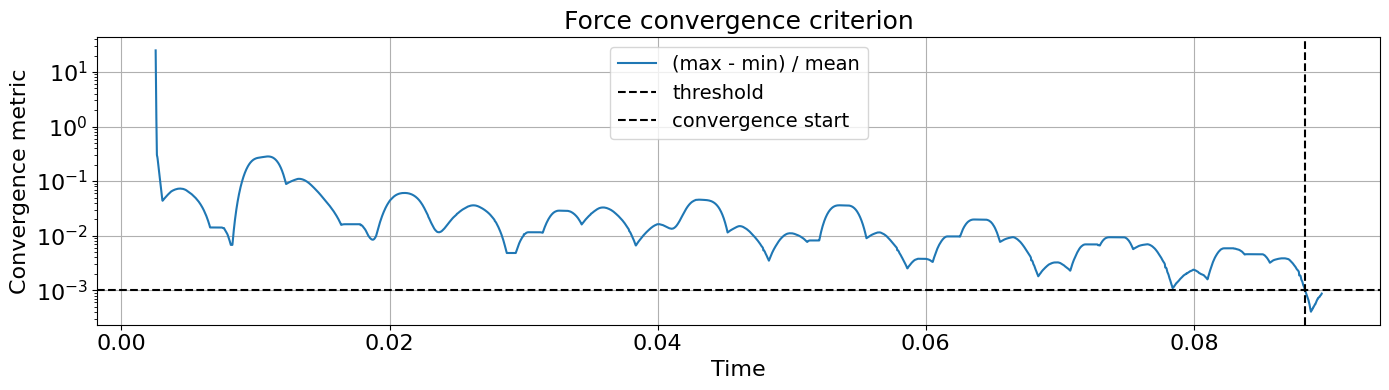

In [5]:
import numpy as np
import matplotlib.pyplot as plt

print('The force convergence metric is defined as the peak-to-peak variation of the force over a sliding window, normalized by the mean force over the same window. A threshold of 1e-3 corresponds to a relative force variation of 0.1%, which is commonly accepted as good convergence in steady CFD simulations.')

# --- settings ---
window = 200
eps_rel = 1e-3
min_mean = 1e-12

Fy_conv = np.asarray(Fy, dtype=float)
t = np.asarray(t, dtype=float)

N = len(Fy_conv)
metric = np.full(N, np.nan)

for i in range(window - 1, N):
    w = Fy_conv[i - window + 1 : i + 1]
    m = np.mean(w)
    denom = max(abs(m), min_mean)
    metric[i] = (np.max(w) - np.min(w)) / denom

good = metric < eps_rel
first_conv = None
if np.any(good):
    suffix_all_good = np.flip(np.cumprod(np.flip(good.astype(int))).astype(bool))
    idx = np.where(suffix_all_good)[0]
    if len(idx) > 0:
        first_conv = idx[0]

# --- plot convergence metric only ---
plt.style.use("default")
plt.figure(figsize=(14, 4))

plt.plot(t, metric, label="(max - min) / mean")
plt.axhline(eps_rel, color="black", linestyle="--", label="threshold")

if first_conv is not None:
    plt.axvline(t[first_conv], color="black", linestyle="--", label="convergence start")

plt.yscale("log")
plt.xlabel("Time", fontsize=16)
plt.ylabel("Convergence metric", fontsize=16)
plt.title("Force convergence criterion", fontsize=18)
plt.tick_params(axis="both", labelsize=16)
plt.grid(True, which="major")
plt.legend(fontsize=14)

plt.tight_layout()
plt.show()
